In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys 
import os
sys.path.append(os.path.abspath("../"))

In [4]:
from qrcode import QRCodeReader, BitMatrix

In [5]:
img = cv2.imread("D:\Data_QR\data\qr_1962.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(3072, 3072, 3)


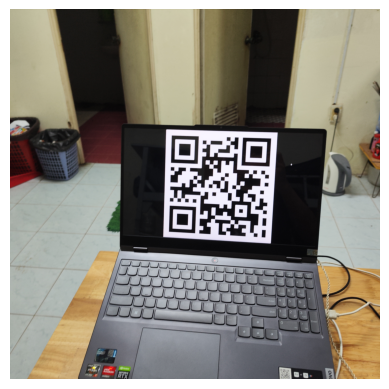

In [6]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
import pathlib
from ultralytics import YOLO

# Định nghĩa đường dẫn đến mô hình và ảnh
model_path = "D:\\HK5\\CS406\\TestQR3\\exportmodel\\best2.pt"
# image_path = pathlib.Path("D:\\Data_QR\\data\\qr_2039.jpg")
image_path = pathlib.Path("D:\Data_QR\data\qr_1962.jpg")
# Tải mô hình
model = YOLO(model_path)

# Dự đoán trên ảnh với các tùy chọn bổ sung
result = model.predict(source=image_path , conf=0.6, save=True, device='cpu')



image 1/1 D:\Data_QR\data\qr_1962.jpg: 640x640 2 qrs, 138.0ms
Speed: 13.1ms preprocess, 138.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict115


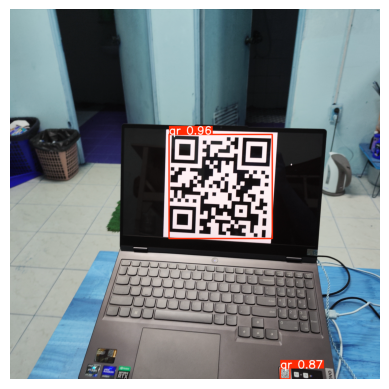

In [8]:
# Hiển thị ảnh (tùy chọn)
img_with_boxes = result[0].plot()
plt.imshow(img_with_boxes)
plt.axis('off')  # Ẩn trục
plt.show()  # Hiển thị ảnh

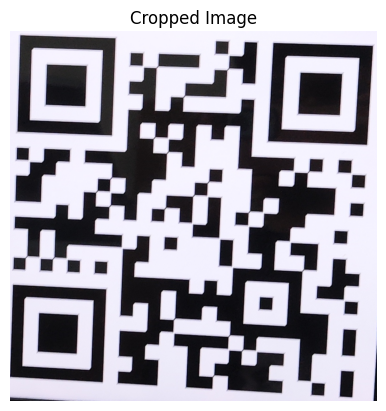

In [9]:
# Đọc ảnh gốc
image = cv2.imread(str(image_path))

# Khởi tạo biến image_crop
image_crop = image

# Lấy bounding box có độ tin cậy cao nhất
for idx, result in enumerate(result):
    if len(result.boxes) > 0:
        # Sắp xếp các box theo độ tin cậy từ cao đến thấp và lấy box đầu tiên
        best_box = sorted(result.boxes, key=lambda box: box.conf[0], reverse=True)[0]
        x_min, y_min, x_max, y_max = map(int, best_box.xyxy[0])  # Lấy tọa độ dạng int

        # Cắt ảnh trong bounding box
        image_crop = image[y_min:y_max, x_min:x_max]
        image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
        # Hiển thị hình ảnh đã cắt
        plt.imshow(image_crop)  # Chuyển đổi màu BGR sang RGB
        plt.axis('off')  # Ẩn trục
        plt.title('Cropped Image')  # Tiêu đề cho hình ảnh
        plt.show()  # Hiển thị cửa sổ
    else:
        print(f"Image {idx + 1}: No bounding box detected.")

# CREATE BITMATRIX

# GRAY SCALE

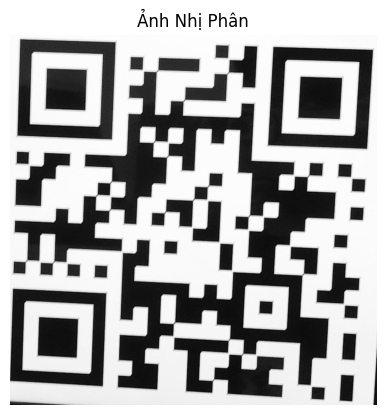

In [10]:
from common import CV2ImageLuminanceSource
source = CV2ImageLuminanceSource(image_crop)
plt.imshow(source.image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')
plt.show()

In [11]:
print(source.image.shape)

(864, 857)


In [12]:
from common import HybridBinarizer
binarizer = HybridBinarizer(source)

In [13]:
from qrcode import BinaryBitmap
bitmap = BinaryBitmap(binarizer)

# CREATE QR CODE READER

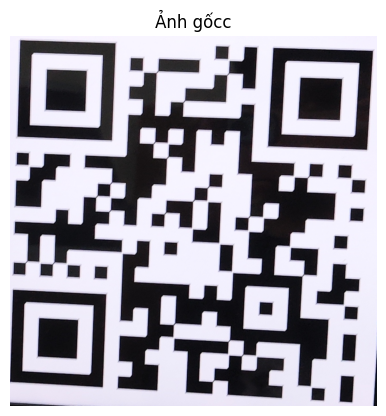

In [14]:
plt.imshow(image_crop, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title("Ảnh gốcc")
plt.show()

In [15]:
reader = QRCodeReader()
res = reader.decode(bitmap)
print(res.bits)
print(np.max(res.bits))
print(np.min(res.bits))
# Hiển thị ảnh nhị phân
plt.imshow(res.bits, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')
plt.show()

Detect
end get black matrix
Pos (131.5,127.0)
Pos (129.25,129.25)
Pos (128.5,130.0)
Pos (128.125,130.375)
Pos (127.9,130.6)
Pos (127.75,130.75)
Pos (127.64285714285714,130.85714285714286)
Pos (127.5625,130.875)
Pos (127.5,130.88888888888889)
Pos (127.45,130.9)
Pos (127.45,130.9)
Pos (127.4090909090909,130.9090909090909)
Pos (724.5,147.0)
Pos (127.4090909090909,130.9090909090909)
Pos (127.375,130.95833333333334)
Pos (435.75,436.0)
Pos (127.375,130.95833333333334)
Pos (127.34615384615384,130.96153846153845)
Pos (435.75,436.0)
Pos (725.0,147.0)
Before:
FinderPattern(count=13, estimated_module_size=31.73626373626374)
FinderPattern(count=2, estimated_module_size=33.285714285714285)
FinderPattern(count=2, estimated_module_size=33.142857142857146)
After:
FinderPattern(count=13, estimated_module_size=31.73626373626374)
FinderPattern(count=2, estimated_module_size=33.142857142857146)
FinderPattern(count=2, estimated_module_size=33.285714285714285)
top_left (435.75,436.0)
top_right (127.34615384

ValueError: cannot convert float NaN to integer